<a href="https://colab.research.google.com/github/LH-1169213/A01169213_OpenMP/blob/master/Copy_of_V2_Proyecto_final_equipo20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primer modelo

##Datos

In [ ]:
#Importamos las librerías necesarias
import numpy as np # Esta permite cálculos en Python y soporta matrices y funciones matemáticas
import matplotlib.pyplot as plt # Librería para visualizar que nos permitirá crear gráficos en una interfaz
import keras # API para construir y entrenar modelos de redes neuronales
from keras.models import Sequential # Permite crear modelos secuenciales donde se añade una capa tras otra
from keras.optimizers import Adam # Optiizador para entrenamiento de redes neuronales
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense # Capas para redes neuronales convolucionales (CNNs)
import cv2 # Librería que incluye algoritmos y técnicas para procesar imágenes y video
import pandas as pd # Proporciona estructuras como DataFrames, esto para almacenar y manipular datos
import random # Librería para generar números pseudoaleatorios, es decir elementos aleatorios y operaciones aleatorias
import os # Creación de directorios, rutas de archivos y guardado de imágenes y registros
import ntpath # Permite manipular rutas de archivos en Windows y otros sistemas operativos
from sklearn.utils import shuffle # Librería de aprendizaje automático, se importa la funcionalidad para mezclar datos aleatorios
from sklearn.model_selection import train_test_split # Para dividir los datos en conjuntos de entrenamiento y prueba de forma aleatoria
import matplotlib.image as mpimg # Submódulo de Matplotlib para leer y escribir imágenes, ayuda en la visualización
from imgaug import augmenters as iaa # Librería para incrementar la diversidad del conjunto de datos y mejorar el modelo

In [ ]:
from google.colab import drive # Función para importar información desde Drive
import os # Creación de directorios, rutas de archivos y guardado de imágenes y registros
from PIL import Image # Nos ayuda a procesar las imágenes
import numpy as np # Esta permite cálculos en Python y soporta matrices y funciones matemáticas

In [ ]:
# Conectamos con Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#El siguiente paso es definir las carpetas para almacenar las imágenes de entrenamiento y los registros de conducción,
#además de especificar las columnas que se leerán del archivo de registro usando la librería pandas.
datadir = '/content/drive/MyDrive/proyecto_final' # Directorio donde se encuentra el archivo CSV
csv_file = 'data_driver1.csv'

columns = ['Center', 'Steering'] # Definimos las columnas del DataFrame

# Leemos el archivo CSV en un DataFrame en pandas
data = pd.read_csv(os.path.join(datadir, csv_file), names = columns)

pd.set_option('display.max_colwidth', None) # Configuramos para mostrar todo el contenido de las columnas

# Mostramos las primeras filas del DataFrame
data.head()

,Center,Steering
0,0.png,3.051.086.342.334.740
1,1.png,20.403.718.915.022.500
2,2.png,59.368.647.521.240.600
3,3.png,41.827.815.955.383.600
4,4.png,-6.027


In [ ]:
# Definimos la función para obtener el nombre del archivo de una ruta completa
# Separamos el nombre del archivo y la ruta de la carpeta omitiendo la ubicación.
def path_leaf(path):
    head, tail = ntpath.split(path) # Este módulo ofrece funcionalidad similar a os.path para Windows, y ntpath.split()
    return tail

# Aplicamos la función a las columnas
data['Center'] = data['Center'].apply(path_leaf) # Función aplicada a la columna center


In [ ]:
# Imprimimos los resultados
print(data['Steering'].dtype)

object


In [ ]:
# Convertimos la columna 'Dirección' a numérica, obligando a los errores a NaN

data['Steering'] = pd.to_numeric(data['Steering'], errors='coerce')

In [ ]:
# Imprimimos el tipo de dato
print(data['Steering'].dtype)

float64


In [ ]:
# Imprimimos la cantidad de datos

print(data['Steering'].sum())

-108868.855229811


In [ ]:
# Imprimimos la cantidad de datos

print(data['Steering'].isna().sum())

145


In [ ]:
# Reemplazamos los valores

data['Steering'].fillna(0, inplace=True)

In [ ]:
# Imprimimos los mínimos y máximos

print(np.min(data['Steering']))
print(np.max(data['Steering']))

-982.0
973.0


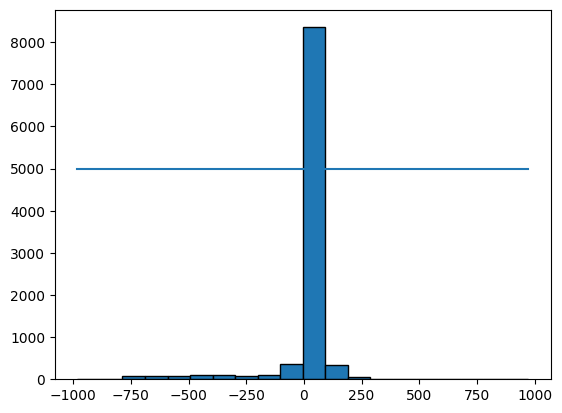

In [ ]:
#Aquí definiremos la cantidad de bins para el histograma
num_bins = 20

# En este punto definimos el número objetivo de muestras por bin para la línea horizontal
samples_per_bin = 5000
# Se suele representar los intervalos contiguos y sin superposición de una variable
# Visualizaremos los datos para determinar su distribución
hist, bins = np.histogram(data['Steering'], num_bins) # Calculamos el histograma de los ángulos de dirección
center = (bins[:-1]+ bins[1:]) * 0.5 # Calculamos el centro de cada bin con la finalidad de posicionar las barras del histograma

# Visualizamos el histograma y la línea objetivo
plt.bar(center, hist, width=(bins[1] - bins[0]), edgecolor='black') # Esto nos permite crear un gráfico de barras para el histograma
plt.plot((np.min(data['Steering']), np.max(data['Steering'])), (samples_per_bin, samples_per_bin)) # Realizamos el dibujo

total data: 9817
removed: 3354
remaining: 6463


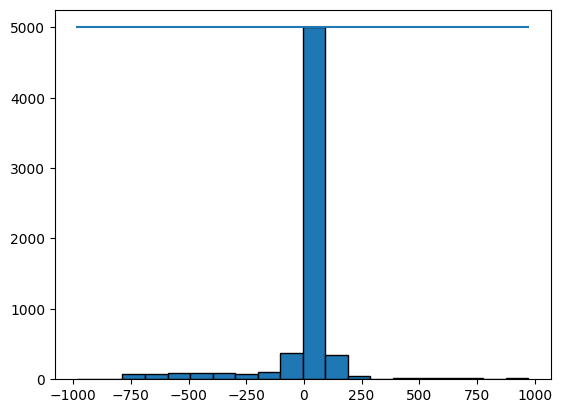

In [ ]:
# Procedemos a realizar el análisis inicial equilibrando la distribución de los datos de dirección en el conjunto de datos.
print('total data:', len(data)) # Imprimimos el total de datos antes de la eliminación
remove_list = [] # Lista donde se almacenarán los índices de las filas a eliminar

# Realizamos una iteración para cada bin del histograma
for j in range(num_bins):
    list_ = []
    # Recogemos los índices de los datos que pertenecen al bin actual
    for i in range(len(data['Steering'])):
        if data['Steering'][i] >= bins[j] and data['Steering'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_) # Hacemos que los datos del bin estén en orden aleatorio
    list_ = list_[samples_per_bin:] # Mantenemos sólo las muestras
    remove_list.extend(list_) # Lo que es eliminado se viene a esta lista

# Procedemos a eralizar la impresión del número de datos eliminados y restantes
print('removed:', len(remove_list)) # Imprimimos el número de datos que han sido eliminados
data.drop(data.index[remove_list], inplace=True) # Eliminamos los datos de los bins excedentes
print('remaining:', len(data)) # Imprimimos el número de datos restantes

# Calculamos y visualizamos el histograma de los datos equilibrados
hist, _ = np.histogram(data['Steering'], (num_bins)) # Calculamos el histograma de los ángulos de dirección
plt.bar(center, hist, width=(bins[1] - bins[0]), edgecolor='black') # Esto nos permite crear un gráfico de barras para el histograma
plt.plot((np.min(data['Steering']), np.max(data['Steering'])), (samples_per_bin, samples_per_bin)) # Realizamos el dibujo

In [ ]:
datadir = '/content/drive/MyDrive/proyecto_final/data entrega final' # Directorio donde se encuentra el archivo CSV


# Definimos la función que toma DataFrame como entradas y nos devuelve las rutas de las imágenes y los valores de dirección
def load_img_steering(datadir, df):
    image_path = [] # Lista para las rutas
    steering = [] # Lista para los valores de dirección
    # Bucle para obtener las rutas de las imágenes y ajustar el valor de dirección
    for i in range(len(df)):
        indexed_data = df.iloc[i] # Obtenemos la fila "i" del DataFrame
        center = indexed_data['Center'] # Extraemos la ruta de la imagen de la fila actual
        image_path.append(os.path.join(datadir, center.strip())) # Añadimos la ruta completa de la imagen y después eliminamos espacios en blanco
        steering.append(float(indexed_data['Steering'])) # Añadimos el ángulo de dirección correspondiente
    image_paths = np.asarray(image_path) # Convertimos la lista de rutas en imágenes en un arreglo NumPy
    steerings = np.asarray(steering) # Convertimos la lista de ángulos en un arreglo NumPy
    return image_paths, steerings

# Se proporciona el directorio de imágenes y Data Frame para obtener los arrays de rutas de imágenes y valores de dirección
image_paths, steerings = load_img_steering(datadir, data)

# Verificamos la salida

print(image_paths[:5])
print(steerings[:5])

['/content/drive/MyDrive/proyecto_final/data entrega final/1.png'
 '/content/drive/MyDrive/proyecto_final/data entrega final/2.png'
 '/content/drive/MyDrive/proyecto_final/data entrega final/3.png'
 '/content/drive/MyDrive/proyecto_final/data entrega final/4.png'
 '/content/drive/MyDrive/proyecto_final/data entrega final/5.png']
[ 0.     0.     0.    -6.027 75.095]


In [ ]:
# Se divide los datos de entrada en conjuntos de datos para nuestros modelos usando la librería scikit-learn
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)

# Hacemos la impresión de algunos ejemplos
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))


Training Samples: 5170
Valid Samples: 1293


Text(0.5, 1.0, 'Validation set')

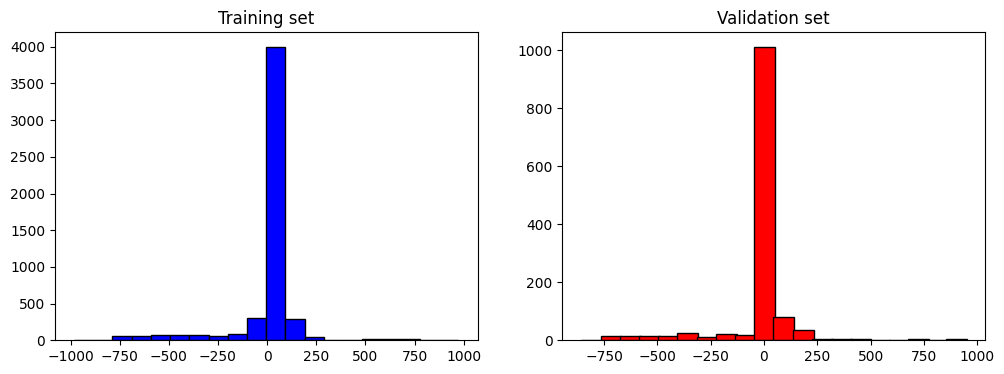

In [ ]:
# Lo siguiente nos permite examinar la distribución de los conjuntos de entrenamiento y prueba
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=(bins[1] - bins[0]), color='blue', edgecolor= 'black')
axes[0].set_title('Training set') # Conjunto de entrenamiento
axes[1].hist(y_valid, bins=num_bins, width=(bins[1] - bins[0]), color='red', edgecolor= 'black' )
axes[1].set_title('Validation set') # Conjunto de prueba

Text(0.5, 1.0, 'Zoomed Image')

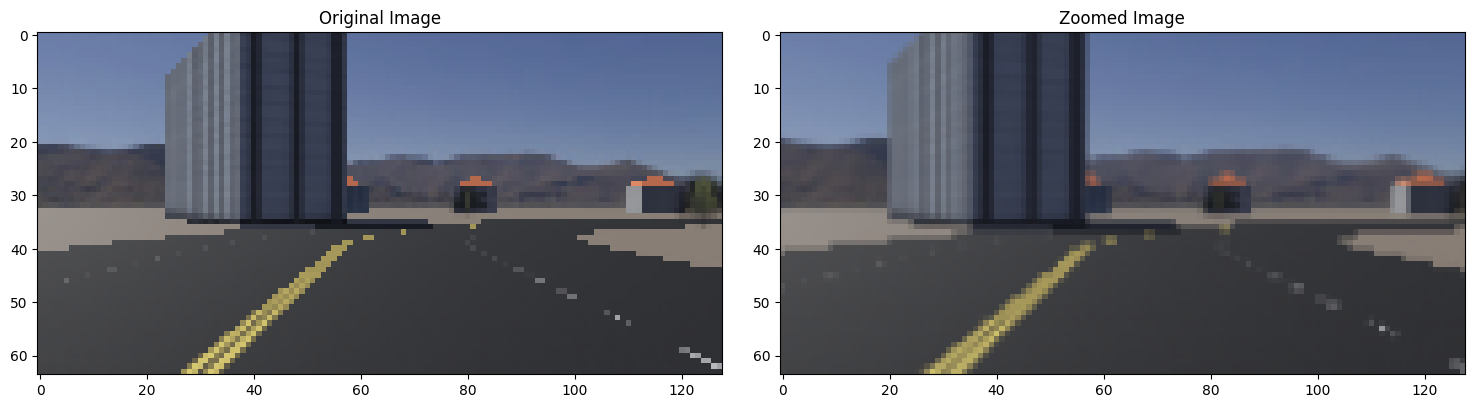

In [ ]:
#Aplicamos la transformación de zoom a una imagen
# Comenzamos definiendo la función a utilizar
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3)) # Definimos la escala definiendo los valores necesarios
    image = zoom.augment_image(image)
    return image

# Seleccionamos una imagen del conjunto de datos de forma aleatoria
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image) # Mantenemos la imagen original para mostrarla después
zoomed_image = zoom(original_image) # Aplicamos la transformación de zoom

# Visualizamos tanto la imagen original como la transformada (zoom)
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
# Imagen original
axs[0].imshow(original_image) # Mostramos la imagen original en el primer subgráfico
axs[0].set_title('Original Image') # Mostramos el nombre de la imagen original en el primer subgráfico
# Imagen con Zoom
axs[1].imshow(zoomed_image) # Mostramos la imagen transformada en el segundo subgráfico
axs[1].set_title('Zoomed Image') # Mostramos el nombre de la imagen transformada en el segundo subgráfico

Text(0.5, 1.0, 'Panned Image')

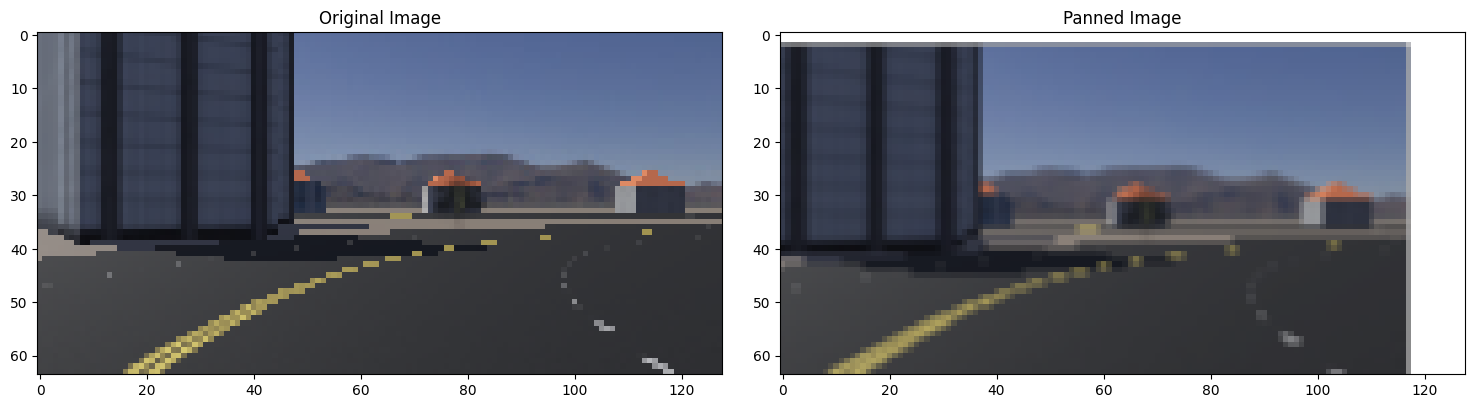

In [ ]:
# Realizamos otra transformación, que en este caso es una panorámica
# Comenzamos por definir la función panoámica
def pan(image):
    pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)}) # Transformación con porcentaje aleatorio
    image = pan.augment_image(image)
    return image

# Seleccionamos una imagen del conjunto de datos de forma aleatoria
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image) # Mantenemos la imagen original para mostrarla después
panned_image = pan(original_image) # Aplicamos la transformación

# Visualizamos tanto la imagen original como la transformada
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
# Imagen original
axs[0].imshow(original_image) # Mostramos la imagen original en el primer subgráfico
axs[0].set_title('Original Image') # Mostramos el nombre de la imagen original en el primer subgráfico
# Imagen Panorámica
axs[1].imshow(panned_image) # Mostramos la imagen transformada en el segundo subgráfico
axs[1].set_title('Panned Image') # Mostramos el nombre de la imagen transformada en el segundo subgráfico

Text(0.5, 1.0, 'Brightness altered image ')

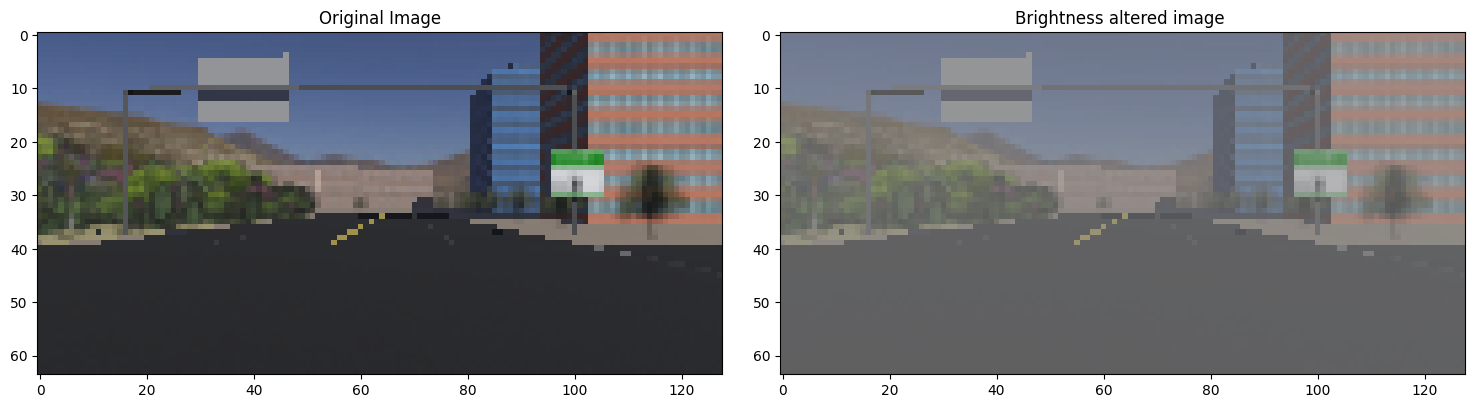

In [ ]:
# Realizamos otra transformación relacionada con el brillo
# Iniciamos definiendo nuestra función para el cambio aleatorio de brillo
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2)) # Se multiplica el brillo por un factor aleatorio
    image = brightness.augment_image(image)
    return image

# Seleccionamos una imagen del conjunto de datos de forma aleatoria
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image) # Mantenemos la imagen original para mostrarla después
brightness_altered_image = img_random_brightness(original_image) # Aplicamos la transformación

# Visualizamos tanto la imagen original como la transformada
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
# Imagen original
axs[0].imshow(original_image) # Mostramos la imagen original en el primer subgráfico
axs[0].set_title('Original Image') # Mostramos el nombre de la imagen original en el primer subgráfico
# Imagen con el brillo modificado
axs[1].imshow(brightness_altered_image) # Mostramos la imagen transformada en el segundo subgráfico
axs[1].set_title('Brightness altered image ') # Mostramos el nombre de la imagen transformada en el segundo subgráfico

Text(0.5, 1.0, 'Flipped Image - Steering Angle:6.116')

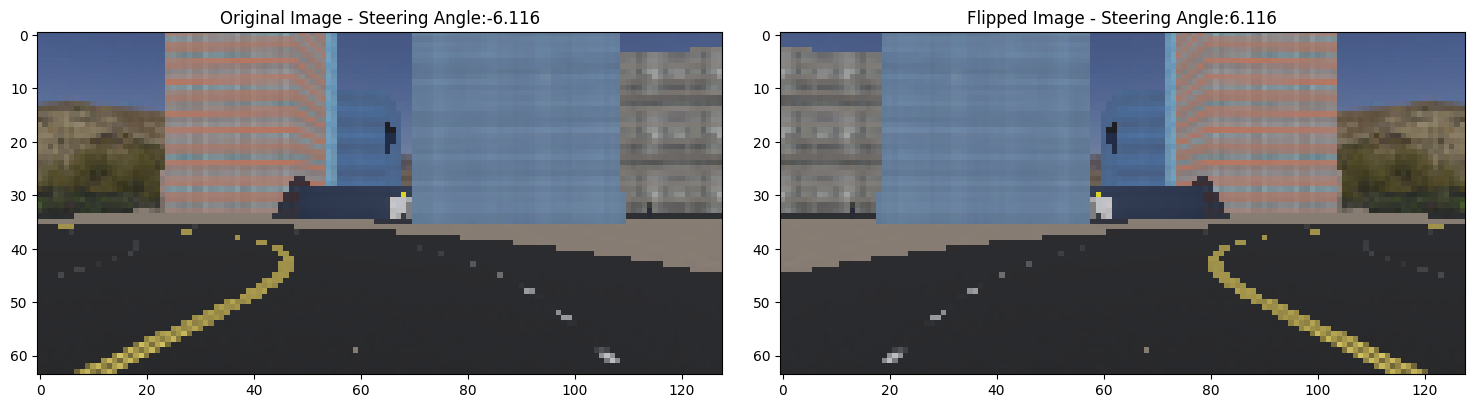

In [ ]:
# Esta transformación nos permite realizar un volteo aleatorio y ajustar el ángulo de dirección
# Iniciamos definiendo nuestra función para voltera aleatoriamente la imagen
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1) # Volteamos la imagen horizontalmente, es decir, sobre el eje vertical
    steering_angle = -steering_angle # Invertimos el ángulo de dirección
    return image, steering_angle

# Seleccionamos una imagen del conjunto de datos de forma aleatoria
random_index = random.randint(0, 1000)
image = image_paths[random_index] # Mantenemos la imagen original para mostrarla después
steering_angle = steerings[random_index] # Aplicamos la transformación

# Leemos una imagen origina desde la ruta
original_image = mpimg.imread(image)

# Aplicamos el volteo aleatorio sobre la imagen seleccionada en la línea anterior
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)
# Visualizamos tanto la imagen original como la volteada
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
# Imagen original
axs[0].imshow(original_image) # Mostramos la imagen original en el primer subgráfico
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle)) # Mostramos el nombre de la imagen original en el primer subgráfico
# Imagen volteada
axs[1].imshow(flipped_image) # Mostramos la imagen transformada en el segundo subgráfico
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle)) # Mostramos el nombre de la imagen transformada en el segundo subgráfico

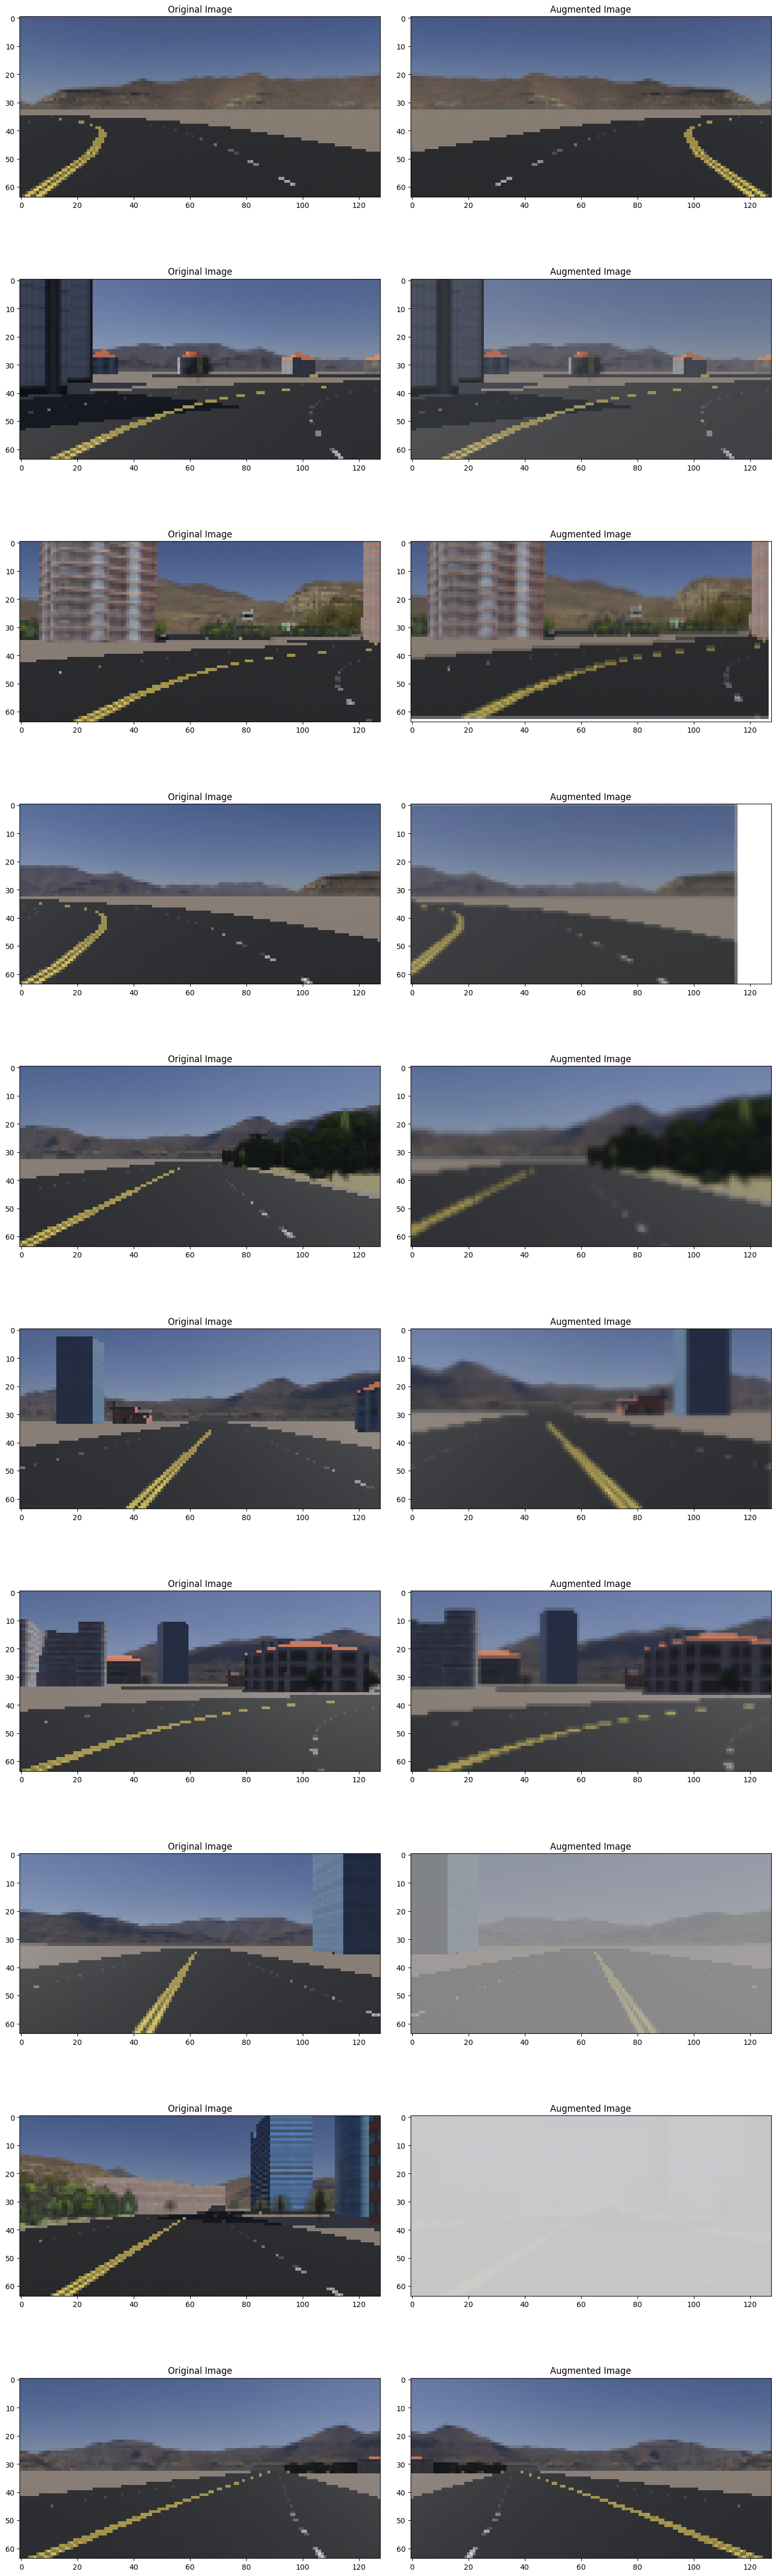

In [ ]:
# Realizaremos transformaciones aleatorias a una imagen y modificaremos el ángulo de dirección
# Iniciamos Definiendo la función para aplicar las transformaciones aleatorias con porcentaje de probabilidad
def random_augment(image, steering_angle):
    image = mpimg.imread(image) # Leemos una imagen desde la ruta
    if np.random.rand() < 0.5:
        image = pan(image) # Aplicamos una transformación panorámica con un % de probabilidad
    if np.random.rand() < 0.5:
        image = zoom(image) # Aplicamos una transformación de zoom con un % de probabilidad
    if np.random.rand() < 0.5:
        image = img_random_brightness(image) # Aplicamos una transformación de brillo con un % de probabilidad
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle) # SE voltea la imagen con un % de probabilidad
    return image, steering_angle

# Configuramos la visualización con el número de filas y columnas
ncol = 2 # Número de columnas
nrow = 10 # Número de filas

# Creamos la figura y los subgráficos
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50)) # Definimos las características de la figura
fig.tight_layout()

# Realizamos una iteración de filas para mostrar las imágenes originales y transformadas
for i in range(10):
    randnum = random.randint(0, len(image_paths) - 1) # Selección de índice aleatorio del conjunto de datos
    random_image = image_paths[randnum] # Obtenemos la ruta de la imagen aleatoria
    random_steering = steerings[randnum] # Obtenemos el ángulo de la dirección

    original_image = mpimg.imread(random_image) # Leemos la imagen original de la ruta
    augmented_image, steering = random_augment(random_image, random_steering) # Aplicamos las transformaciones aleatorias

    # Imagen original
    axs[i][0].imshow(original_image) # Mostramos la imagen original en el primer subgráfico
    axs[i][0].set_title("Original Image") # Mostramos el nombre de la imagen original en el primer subgráfico
    # Imagen transformada
    axs[i][1].imshow(augmented_image) # Mostramos la imagen transformada en el segundo subgráfico
    axs[i][1].set_title("Augmented Image") # Mostramos el nombre de la imagen transformada en el segundo subgráfico

Text(0.5, 1.0, 'Preprocessed Image')

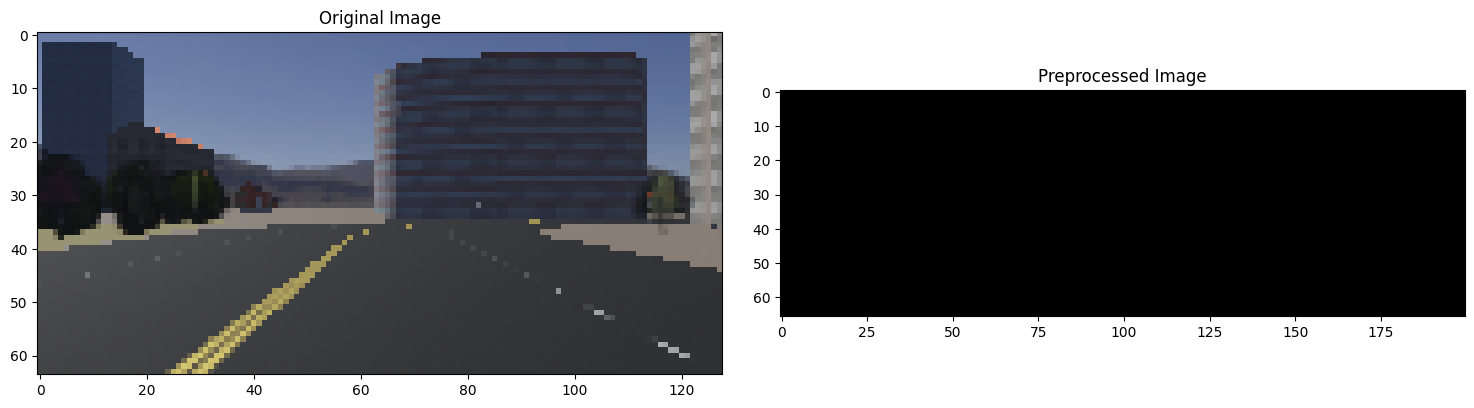

In [ ]:
# Realizaremos varias transformaciones en una imagen de entrada como preparación para nuestro modelo
# Iniciamos por definir nuestra función para el procesamiento de la imagen
def img_preprocess(img):
    img = img[60:135,:,:] # Recortamos la región de interés
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV) # Realizamos una conversión pasando de RGB a YUV
    img = cv2.GaussianBlur(img, (3, 3), 0) # Aplicamos un filtro de desenfoque Gaussiano
    img = cv2.resize(img, (200, 66)) # Realizamos un redimensionamiento de la imagen
    img = img/255 # Aplicamos una normalización de los valores de los pixeles entre 0 y 1
    return img

# Procedemos a usar la función y así procesar una imagen para nuestro modelo
image = image_paths[100] # Seleccionamos una imagen de ejemplo
original_image = mpimg.imread(image) # Se lee la imagen original desde la ruta
preprocessed_image = img_preprocess(original_image) # Aplicamos el procesamiento a la imagen original

# Mostramos los resultados
fig, axs = plt.subplots(1, 2, figsize=(15, 10)) # Definimos las características de la figura
fig.tight_layout()
# Imagen original
axs[0].imshow(original_image) # Mostramos la imagen original en el primer subgráfico
axs[0].set_title('Original Image') # Mostramos el nombre de la imagen original en el primer subgráfico
# Imagen procesada
axs[1].imshow(preprocessed_image) # Mostramos la imagen procesada en el segundo subgráfico
axs[1].set_title('Preprocessed Image') # Mostramos el nombre de la imagen procesada en el segundo subgráfico

In [ ]:
# Generaremos batches de datos, para lo cual definiremos la siguiente función
def batch_generator(image_paths, steering_ang, batch_size, istraining):
    # Iniciamos con un bucle para que la ejecución sea continua
    while True:
        batch_img = [] # Lista para almacenar las imágenes procesadas del batch actual
        batch_steering = [] # Lista para almacenar los ángulos de dirección del bach actual
        # Iteración para crear un batch completo de datos cada vez
        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1) # Selecciona de forma aleatora un índice de la lista con datos aleatorios
            # Realizamos la augmentación de imágenes verificando que se está en modo entrenamiento
            if istraining:
                im, steering = random_augment(image_paths[random_index], steering_ang[random_index]) # Aplicamos augmentaciones aleatorias a la imagen y obtenemos el ántulo de dirección correspondiente
            # Alternativa si no se está en modo de entrenamiento
            else:
                im = mpimg.imread(image_paths[random_index]) # Leemos la imagen desde la ruta
                steering = steering_ang[random_index] # Obtenemos el ángulo de dirección correspondiente
            # Realizamos el preprocesamiento de la imagen
            im = img_preprocess(im) # Preprocesamos la imagen
            batch_img.append(im) # Añadimos la imagen preprocesada al batch actual
            batch_steering.append(steering) # Añadimos el ángulo de dirección al batch de ángulos
        yield (np.asarray(batch_img), np.asarray(batch_steering)) # Generamos el batch como un par de arrays con las imágenes preprocesadas y los ángulos de dirección

Text(0.5, 1.0, 'Validation Image')

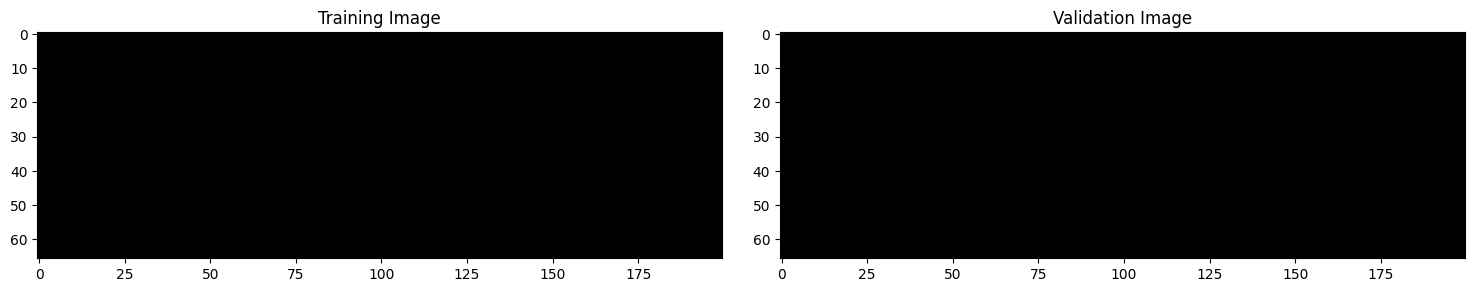

In [ ]:
# Visualizaremos las imágenes de los generadores
# Genermaos un batch con los datos de entrenamiento y prueba
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1)) # Entrenamiento
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0)) # Prueba

# Mostramos los resultados
fig, axs = plt.subplots(1, 2, figsize=(15, 10)) # Definimos las características de la figura
fig.tight_layout()

# Mostrar la imagen de entrenamiento
axs[0].imshow(x_train_gen[0]) # Mostramos la imagen de entrenamietno en el primer subgráfico
axs[0].set_title('Training Image')  # Mostramos el nombre de la imagen de entrenamiento en el primer subgráfico
# Mostrar la imagen de prueba
axs[1].imshow(x_valid_gen[0]) # Mostramos la imagen de prueba en el segundo subgráfico
axs[1].set_title('Validation Image') # Mostramos el nombre de la imagen de prueba en el segundo subgráfico

##Creación del modelo


In [ ]:
# Iniciamos importando las librerías que vamos a utilizar
import tensorflow as tf # Librería para tareas de aprendizaje automático y aprendizaje profundo
from tensorflow.keras.models import Sequential # Clase que permite construir modelos de redes neuronales
from tensorflow.keras.layers import Conv2D, Dropout, Flatten, Dense, Lambda, MaxPooling2D # Redes neuronales y entrenamiento

# Definimos la función para nuestro modelo
def nvidia_model():
    model = Sequential() #Creamos la instancia del modelo secuencial de Keras
    model.add(Lambda(lambda x: x/127.5 - 1.0, input_shape=(66, 200, 3))) # Normalizamos los datos
    # Realizamos las capas convolucionales
    model.add(Conv2D(24, (5, 5), strides=(2, 2), activation='relu'))
    model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='relu'))
    model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    # Aplanamos y capas densas
    model.add(Flatten()) # Aplanamos la salida de las capas convolucionales
    model.add(Dense(100, activation='relu')) # Añadimos una capa conectada con neuronas y activación ReLU
    model.add(Dropout(0.5)) # Añadimos cpaa de Dropout para prevenir sobreajuste
    model.add(Dense(50, activation='relu')) # Añadimos capas conectadas con cierta cantidad de neuronas
    model.add(Dropout(0.5)) # Añadimos cpaa de Dropout para prevenir sobreajuste
    model.add(Dense(10, activation='relu')) # Añadimos capas conectadas con cierta cantidad de neuronas
    model.add(Dense(1)) # Capa de salida para predecir algún valor continuo

    # Compilación del modelo
    model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
    return model

# Creación y resumen del modelo
model = nvidia_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 66, 200, 3)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

In [ ]:
# Entrenamos nuestro modelo usando los datos generados por batches
# Se colocan los parámetros para los datos de entrenamiento
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                              steps_per_epoch=300,
                              epochs=10,
                              validation_data=batch_generator(X_valid, y_valid, 100, 0),
                              validation_steps=200,
                              verbose=1,
                              shuffle = 1)

<ipython-input-199-b425020e16e2>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),


Epoch 1/10
300/300 [==============================] - 2581s 9s/step - loss: 29057.9180 - val_loss: 30232.8457
Epoch 2/10
300/300 [==============================] - 226s 755ms/step - loss: 29486.7891 - val_loss: 29254.5723
Epoch 3/10
300/300 [==============================] - 215s 718ms/step - loss: 29267.2988 - val_loss: 27821.1836
Epoch 4/10
300/300 [==============================] - 218s 730ms/step - loss: 29715.9238 - val_loss: 30014.6758
Epoch 5/10
300/300 [==============================] - 215s 718ms/step - loss: 28630.0957 - val_loss: 29259.3145
Epoch 6/10
300/300 [==============================] - 207s 692ms/step - loss: 29085.8535 - val_loss: 29801.4688
Epoch 7/10
300/300 [==============================] - 208s 695ms/step - loss: 28553.4238 - val_loss: 29224.4766
Epoch 8/10
300/300 [==============================] - 213s 712ms/step - loss: 29762.1113 - val_loss: 30002.3848
Epoch 9/10
300/300 [==============================] - 210s 702ms/step - loss: 29044.5801 - val_loss: 28792

Text(0.5, 0, 'Epoch')

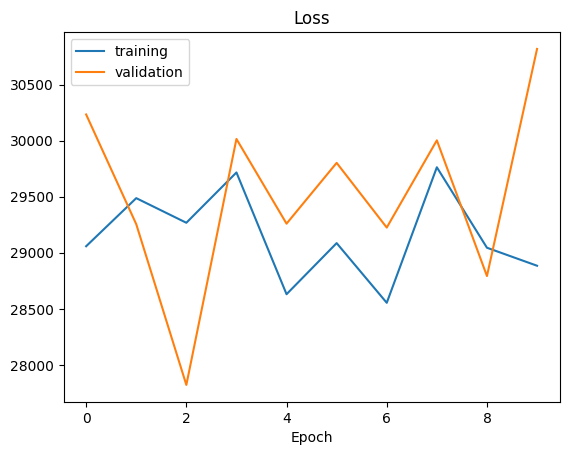

In [ ]:
# Evaluamos la pérdida de entrenamiento y validación de nuestro modelo
plt.plot(history.history['loss']) # Permite conocer la pérdida en el conjunto de datos de entrenamiento en las épocas
plt.plot(history.history['val_loss']) # Nos ayuda a trazar la pérdida de conjunto de datos de validación
plt.legend(['training', 'validation']) # Agregamos la leyenda para identificar las curvas
plt.title('Loss') # Nombre del gráfico
plt.xlabel('Epoch') # Indica número de épocas

In [ ]:
# Procedemos a guardar el modelo que será utilizado en la conducción autónoma
model.save('model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Evaluación del modelo

In [ ]:
# Instalamos las librerías necesarias
!pip install python-socketio  # Facilita la comunicación bidireccional en tiempo real para ejecutar modelos de aprendizaje automático
!pip install eventlet  # Proporciona un modelo de programación asíncrona que permite múltiples tareas sin bloquear el hilo principal de ejecución

# Importamos las librerías necesarias
import numpy as np  # Permite cálculos en Python y soporta matrices y funciones matemáticas
from flask import Flask  # Framework que permite realizar predicciones en un modelo Keras a través de solicitudes HTTP
from keras.models import load_model  # Función de Keras que permite cargar modelos guardados previamente en formato HDF5
import base64  # Módulo de Python para codificar datos binarios a una representación en base64 y decodificarlos nuevamente a su forma original
from io import BytesIO  # Proporciona una interfaz de archivo que opera en memoria y sirve para tratar datos binarios como archivos de entrada o salida
from PIL import Image  # Nos ayuda a procesar las imágenes
import cv2  # Librería que incluye algoritmos y técnicas para procesar imágenes y video

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 10.8 MB/s eta 0:00:00



#Segundo modelo